###### The Skimage library allows us to use Python to perform image processing. 
The language is quite easy to grasp, but it performs some of the most difficult tasks. To get started, I imported few basic libraries.

In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

# necessary packages
import os
import skimage
import matplotlib.pyplot as plt  
import cv2

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

###### Import the images

Created variable names to store paths of necessary samples/subdirectories from given data folders.

In [2]:
# Reading the necessary subdirectories (o’,’q’,’G’ and digit ’8’)

data_o = "C:/Users/Barghavi/Desktop/CNN/English/Img/GoodImg/Bmp/Sample051/"
data_q = "C:/Users/Barghavi/Desktop/CNN/English/Img/GoodImg/Bmp/Sample053/"
data_G = "C:/Users/Barghavi/Desktop/CNN/English/Img/GoodImg/Bmp/Sample017/"
data_8 = "C:/Users/Barghavi/Desktop/CNN/English/Img/GoodImg/Bmp/Sample009/"

###### Converting Sample files to respective Dataframes

Here, I loaded images from their respective folders and performed following operations-

Resize - I matched the size of all images to 150x150 as this is very important to understand the structure if image.

GreyScale - The images in raw data are in format of BGR/RGB color space which is defined by the three chromaticities of the red, green, and blue additive primaries(In simple words - they are made from Red,blue, green colored lights stacked). Grascale is a way to reduce dimention as it have only two colors black and white. Here, Each pixel have three colors and all these colors have luminance which can be summed for each pixel.

In [3]:
# Generating the data
IMAGE_SIZE = (150, 150)

def readdata(data,label):
    images =[]
    labels =[]
    output=[]
    # Iterate through each image in our folder
    print("Loading {}".format(data))
    
    for folder in os.listdir(data):
                
        # Get the path name of the image
        img_path = os.path.join(os.path.join(data), folder)
        
        # Open and resize the img
        image = cv2.imread(img_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        image = cv2.resize(image, IMAGE_SIZE)
        
        # Append the image and its corresponding label to the output
        images.append(image)
        labels.append(label)
     
    dataset_img = pd.DataFrame({'image': images, 
                   'label': label })

    return dataset_img


In [4]:
dataset_o = readdata(data_o,"o")
dataset_o.head()

Loading C:/Users/Barghavi/Desktop/CNN/English/Img/GoodImg/Bmp/Sample051/


,image,label
0,"[[173, 170, 167, 168, 177, 193, 202, 202, 193,...",o
1,"[[137, 133, 136, 138, 136, 133, 139, 139, 140,...",o
2,"[[137, 133, 136, 138, 136, 133, 139, 139, 140,...",o
3,"[[129, 128, 128, 131, 134, 136, 134, 134, 133,...",o
4,"[[142, 141, 140, 145, 144, 146, 143, 138, 136,...",o


In [5]:
dataset_q = readdata(data_q,"q")
dataset_q.head()

Loading C:/Users/Barghavi/Desktop/CNN/English/Img/GoodImg/Bmp/Sample053/


,image,label
0,"[[107, 105, 100, 111, 112, 109, 119, 110, 102,...",q
1,"[[62, 60, 62, 62, 60, 60, 58, 61, 59, 57, 59, ...",q
2,"[[221, 221, 221, 222, 223, 223, 224, 224, 219,...",q
3,"[[7, 7, 7, 6, 6, 5, 4, 3, 3, 3, 3, 4, 4, 4, 4,...",q
4,"[[245, 245, 245, 244, 244, 244, 244, 244, 244,...",q


In [6]:
dataset_G = readdata(data_G,"G")
dataset_G.head()

Loading C:/Users/Barghavi/Desktop/CNN/English/Img/GoodImg/Bmp/Sample017/


,image,label
0,"[[122, 119, 117, 117, 118, 118, 119, 119, 120,...",G
1,"[[74, 76, 77, 79, 83, 81, 72, 65, 66, 70, 69, ...",G
2,"[[77, 76, 75, 71, 65, 68, 78, 89, 93, 82, 73, ...",G
3,"[[68, 69, 69, 69, 68, 68, 69, 70, 71, 71, 70, ...",G
4,"[[95, 95, 95, 94, 94, 95, 96, 98, 97, 97, 96, ...",G


In [7]:
dataset_8 = readdata(data_8,"8")
dataset_8.head()

Loading C:/Users/Barghavi/Desktop/CNN/English/Img/GoodImg/Bmp/Sample009/


,image,label
0,"[[38, 38, 39, 40, 40, 39, 39, 39, 39, 39, 40, ...",8
1,"[[208, 208, 208, 208, 208, 208, 208, 209, 209,...",8
2,"[[62, 62, 61, 61, 60, 59, 59, 59, 59, 59, 59, ...",8
3,"[[119, 119, 119, 120, 120, 121, 120, 119, 118,...",8
4,"[[39, 39, 40, 41, 42, 45, 48, 47, 47, 44, 41, ...",8


###### Combining Dataframes "o" - "q" and "G" - "8"

Created Three dataframes for the workin on models as Dataset with "o" & "q", Dataset with "G" & "8" and Dataset with "o", "q", "G" and "8".Then used sample(frac=1) to shuffle the data.

In [8]:
def combine(data1,data2):
    dataset_cmb = pd.concat([data1, data2])
    print("Original data\n\n",dataset_cmb)
    
    print("-------------------------------------")
    
    # shuffle the DataFrame rows
    dataset_cmb = dataset_cmb.sample(frac = 1)
    print("\nData after Shuffling\n\n",dataset_cmb)
    return dataset_cmb
    

In [9]:
# Combinig datasets "o" and "q" (sample051 and sample052)
dataset_oq = combine(dataset_o,dataset_q)

Original data

                                                 image label
0   [[173, 170, 167, 168, 177, 193, 202, 202, 193,...     o
1   [[137, 133, 136, 138, 136, 133, 139, 139, 140,...     o
2   [[137, 133, 136, 138, 136, 133, 139, 139, 140,...     o
3   [[129, 128, 128, 131, 134, 136, 134, 134, 133,...     o
4   [[142, 141, 140, 145, 144, 146, 143, 138, 136,...     o
..                                                ...   ...
49  [[230, 230, 230, 230, 230, 230, 230, 230, 230,...     q
50  [[183, 184, 183, 183, 182, 182, 183, 197, 229,...     q
51  [[91, 92, 92, 91, 91, 91, 91, 91, 92, 92, 92, ...     q
52  [[74, 74, 74, 74, 73, 73, 73, 73, 72, 72, 72, ...     q
53  [[120, 118, 118, 120, 122, 123, 123, 125, 125,...     q

[202 rows x 2 columns]
-------------------------------------

Data after Shuffling

                                                  image label
132  [[53, 53, 52, 52, 52, 52, 53, 53, 52, 52, 52, ...     o
16   [[78, 78, 77, 77, 76, 75, 74, 74, 74, 73, 74, ...  

In [10]:
# Combinig datasets "G" and "8" (sample051 and sample052)
dataset_G8 = combine(dataset_G,dataset_8)

Original data

                                                 image label
0   [[122, 119, 117, 117, 118, 118, 119, 119, 120,...     G
1   [[74, 76, 77, 79, 83, 81, 72, 65, 66, 70, 69, ...     G
2   [[77, 76, 75, 71, 65, 68, 78, 89, 93, 82, 73, ...     G
3   [[68, 69, 69, 69, 68, 68, 69, 70, 71, 71, 70, ...     G
4   [[95, 95, 95, 94, 94, 95, 96, 98, 97, 97, 96, ...     G
..                                                ...   ...
27  [[155, 155, 155, 155, 154, 154, 154, 154, 154,...     8
28  [[135, 136, 137, 138, 139, 139, 139, 138, 138,...     8
29  [[134, 133, 131, 133, 138, 141, 142, 143, 143,...     8
30  [[154, 154, 153, 153, 152, 152, 153, 154, 154,...     8
31  [[110, 110, 110, 110, 110, 110, 110, 110, 110,...     8

[175 rows x 2 columns]
-------------------------------------

Data after Shuffling

                                                  image label
29   [[229, 229, 228, 228, 228, 228, 227, 227, 227,...     G
77   [[110, 110, 109, 108, 108, 107, 107, 106, 106,...  

###### Visualization of first 5 images from Draframes

In [11]:
# Display of the images from dataset

def display(images, labels):
    
    fig = plt.figure(figsize=(10,10))
    fig.suptitle("Some examples of images of the dataset", fontsize=16)
    for i in range(5):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images.iloc[i], cmap=plt.cm.binary)
        plt.xlabel(labels.iloc[i])
    plt.show()

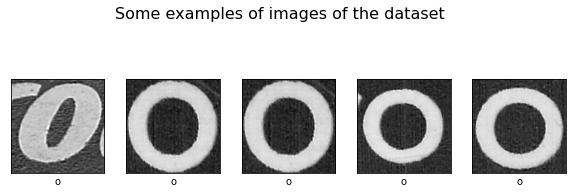

In [12]:
display(dataset_o['image'],dataset_o['label'])

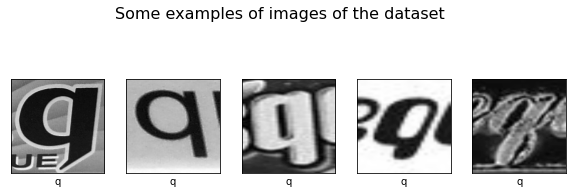

In [13]:
display(dataset_q['image'],dataset_q['label'])

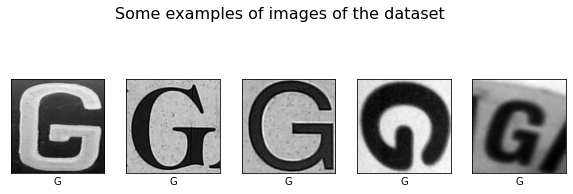

In [14]:
display(dataset_G['image'],dataset_G['label'])

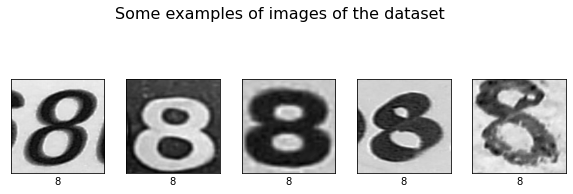

In [15]:
display(dataset_8['image'],dataset_8['label'])

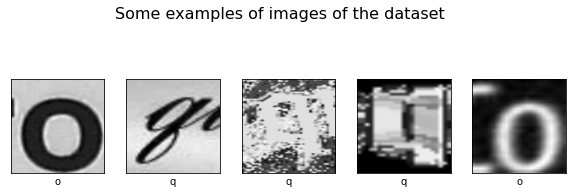

In [16]:
display(dataset_oq['image'],dataset_oq['label'])

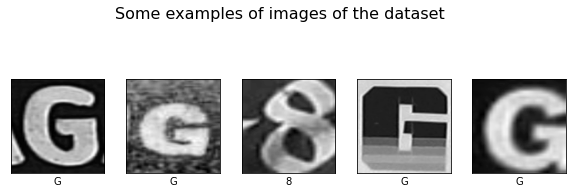

In [17]:
display(dataset_G8['image'],dataset_G8['label'])

###### Converting the Target values of the datasets into binary format

For better classification, I converted target values to respective binary format

Labels are created for every character.

For 'oq' classifier - m belongs to class o and q belongs to class 1
For 'G8' classifier - m belongs to class G and 8 belongs to class 1
Following are the labels of characters in multi-class classification
o - 0
q - 1
G - 2
8 - 3

In [18]:
dataset_oq['label'] = dataset_oq['label'].map({'o': 0, 'q': 1})
dataset_G8['label'] = dataset_G8['label'].map({'G': 0, '8': 1})

In [19]:
# to convert all the labels of letters into integer labels
data_g8 = dataset_G8.copy()
data_g8['label'] = data_g8['label'].map({0: 2, 1: 3})
dataset_oqG8 = combine(data_g8,dataset_oq)

Original data

                                                 image  label
29  [[229, 229, 228, 228, 228, 228, 227, 227, 227,...      2
77  [[110, 110, 109, 108, 108, 107, 107, 106, 106,...      2
27  [[155, 155, 155, 155, 154, 154, 154, 154, 154,...      3
66  [[42, 42, 44, 43, 41, 40, 40, 39, 39, 38, 38, ...      2
45  [[186, 186, 186, 186, 186, 186, 186, 186, 186,...      2
..                                                ...    ...
83  [[102, 102, 102, 102, 102, 102, 102, 102, 102,...      0
12  [[94, 94, 92, 91, 89, 89, 90, 91, 91, 92, 92, ...      0
67  [[58, 58, 58, 58, 58, 57, 57, 57, 57, 57, 57, ...      0
31  [[55, 55, 55, 54, 54, 53, 53, 53, 53, 53, 53, ...      0
97  [[105, 105, 105, 109, 114, 119, 125, 130, 135,...      0

[377 rows x 2 columns]
-------------------------------------

Data after Shuffling

                                                  image  label
0    [[107, 105, 100, 111, 112, 109, 119, 110, 102,...      1
48   [[255, 255, 255, 255, 255, 255, 255, 

###### Pickling the final Dataframes

I pickled the dataframes using pickle package(It serializes the objects so they can be saved into files) to have storage of objects and load for further usage.

In [20]:
import pickle

with open('dataoq.obj', 'wb') as fp:
     pickle.dump(dataset_oq, fp)
with open('datag8.obj', 'wb') as fp:
     pickle.dump(dataset_G8, fp)
with open('dataoqg8.obj', 'wb') as fp:
     pickle.dump(dataset_oqG8, fp)

###### Reloading Dataframes from pickle file

Using the data stored in the pickle files

In [21]:
with open('dataoq.obj', 'rb') as fp:
     data_oq=pickle.load(fp)
with open('datag8.obj', 'rb') as fp:
     data_G8=pickle.load(fp)
with open('dataoqg8.obj', 'rb') as fp:
     data_oqG8=pickle.load(fp)

###### Data Visualization Plots

I used count plots from matplotlib package to visualize the data. It is clearly evident that our data is skewed.

Imbalanced classifications present a challenge for predictive modelling because the majority of machine learning algorithms used for classification were designed with the assumption of an equal number of examples for each class.


Samples of O's and q's-
 0    148
1     54
Name: label, dtype: int64


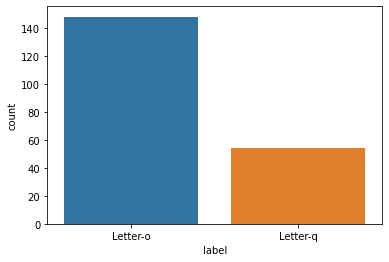

In [22]:
# visualize the target variable
import matplotlib.pyplot as plt
import seaborn as sns

print("Samples of O's and q's-\n",data_oq['label'].value_counts())
g = sns.countplot(data_oq['label'])
g.set_xticklabels(['Letter-o','Letter-q'])
plt.show()

Samples of G's and 8's-
 0    143
1     32
Name: label, dtype: int64


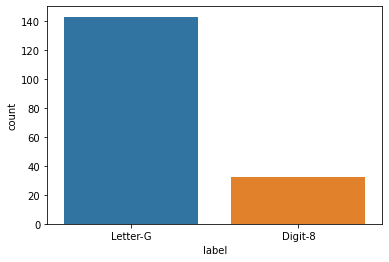

In [23]:
print("Samples of G's and 8's-\n",data_G8['label'].value_counts())
g = sns.countplot(data_G8['label'])
g.set_xticklabels(['Letter-G','Digit-8'])
plt.show()

Samples of O's and q's, G's and 8's-
 0    148
2    143
1     54
3     32
Name: label, dtype: int64


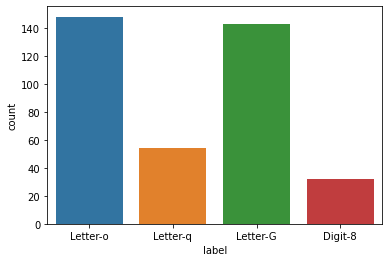

In [24]:
print("Samples of O's and q's, G's and 8's-\n",data_oqG8['label'].value_counts())
g = sns.countplot(data_oqG8['label'])
g.set_xticklabels(['Letter-o','Letter-q','Letter-G',"Digit-8"])
plt.show()

###### Class Imbalance

Class Imbalance - When the data have distribtion of classes in the target vary from simple bias to severe imbalance, class imbalance techniques are used to balance the distribution.
Here, I'm using Oversampling the minority class with SMOTE to modify the unequally distributed classes. 

I used train_test_split to split the data into 80% train data nad 20% test data.The stratify parameter train_test_split is used to main resonable distribution of classes in test data. Then permormed the oversampling on train part alone.

In [25]:
#OVER-SAMPLING using SMOTE.

from imblearn.over_sampling import SMOTE
from collections import Counter

def oversampling(X_train, y):
    ros = SMOTE(random_state=42)
    X_train_overresampled, y_train_overresampled = ros.fit_resample(X_train, y)
    
    print(Counter(y_train_overresampled).items())
    return X_train_overresampled,y_train_overresampled

In [26]:
def reshapes(z):
    nsamples, nx, ny = z.shape
    z = z.reshape((nsamples,nx*ny))
    return z

In [27]:
from sklearn.utils import shuffle

def datapartition(dataset):
    #Split data into a test and training set
    X = np.array(dataset['image'].tolist())
    y = np.array(dataset['label'])
    
    #scaling the features
    X_train_scaled = X/255.0    
    X_train_scaled = reshapes(X_train_scaled)
    
    # test is now 20% of the initial data set
    # train is now 80% of the initial data set
    X_train, X_test, y_train, y_test = train_test_split(X_train_scaled, y, test_size=0.2,stratif = y, random_state=9)
    
    print("Train data size: ", X_train.shape, y_train.shape)
    print("Test data size:",X_test.shape, y_test.shape)
    
    print('Original dataset shape - ', Counter(y_train))
    
    # sampling data
    X_train_overresampled,y_train_overresampled = oversampling(X_train, y_train)
    
    
    print('\nResample dataset shape - ', Counter(y_train_overresampled))
    
    X_train_overresampled,y_train_overresampled = shuffle(X_train_overresampled,y_train_overresampled)
    
    return X_train_overresampled,X_test, y_train_overresampled, y_test

In [28]:
X_train_oq, X_test_oq, y_train_oq, y_test_oq = datapartition(data_oq)

Train data size:  (161, 22500) (161,)
Test data size: (41, 22500) (41,)
Original dataset shape -  Counter({0: 119, 1: 42})
dict_items([(0, 119), (1, 119)])

Resample dataset shape -  Counter({0: 119, 1: 119})


In [29]:
X_train_G8, X_test_G8, y_train_G8, y_test_G8 = datapartition(data_G8)

Train data size:  (140, 22500) (140,)
Test data size: (35, 22500) (35,)
Original dataset shape -  Counter({0: 115, 1: 25})
dict_items([(1, 115), (0, 115)])

Resample dataset shape -  Counter({1: 115, 0: 115})


In [30]:
X_train_oqG8, X_test_oqG8, y_train_oqG8, y_test_oqG8 = datapartition(data_oqG8)

Train data size:  (301, 22500) (301,)
Test data size: (76, 22500) (76,)
Original dataset shape -  Counter({2: 120, 0: 118, 1: 36, 3: 27})
dict_items([(2, 120), (0, 120), (1, 120), (3, 120)])

Resample dataset shape -  Counter({2: 120, 0: 120, 1: 120, 3: 120})


### Binary classification

Basically,It is classification of the two groups into thier respectives on basis of classification rule.

Here, I'm using logistic regression(solver = "liblinear") as my model classifier for the data samples ["o","q"] and ["G","8"].

###### K-fold cross validation

A single k-fold cross-validation run may produce a noisy estimate of model performance. Different data splits may produce very different results. Simply repeating the cross-validation procedure multiple times and reporting the mean result across all folds from all runs is all that is required. This average result will be a more accurate estimate.

Here, I used 5- fold cross validation which is more reasonable with small datasets. Then created a dataframe for the all cross-validation accracies for each fold and thier mean , standard deviation. 

In [31]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import classification_report, accuracy_score, make_scorer

# Importing Logestic regression from Linear model
from sklearn.linear_model import LogisticRegression

data={"Kfold":["Cv-1","Cv-2","Cv-3","Cv-4","Cv-5"]}
table_acc=pd.DataFrame(data,columns=["Kfold"])

cv=RepeatedKFold(n_splits=5,n_repeats=1,random_state=1)


classifiers = [ 
    LogisticRegression(max_iter = 1000,penalty='l2',tol=0.001, solver='liblinear',class_weight="balanced",random_state=12)
    ]

def main(X_train,y,model):
    
    for clf in classifiers:
        name = (clf.__class__.__name__) + (model) 
        print("\nModel classifier = ",name)
        print('\n****Results****')
        clfN=cross_val_score(clf, X_train, y, cv=cv)
        table_acc[name]=clfN
        print("\nTen-fold cross validation score\n\n",clfN)
        acc=clfN.mean()
        print("\nMean Accuracy - ",acc) 
        print("\n------------------------------------------------------------------------------------------\n")

In [32]:
main(X_train_oq,y_train_oq," - Sample-o & q")


Model classifier =  LogisticRegression - Sample-o & q

****Results****

Ten-fold cross validation score

 [0.89583333 0.95833333 0.91666667 0.93617021 0.85106383]

Mean Accuracy -  0.911613475177305

------------------------------------------------------------------------------------------



In [33]:
main(X_train_G8,y_train_G8,"- Sample-G & 8")


Model classifier =  LogisticRegression- Sample-G & 8

****Results****

Ten-fold cross validation score

 [0.93478261 0.86956522 0.7826087  0.95652174 0.93478261]

Mean Accuracy -  0.8956521739130435

------------------------------------------------------------------------------------------



In [34]:
Cv_scores=table_acc.copy()
Cv_scores.loc['mean'] = Cv_scores.mean()
Cv_scores.loc['stdev'] = Cv_scores.std()
Cv_scores=Cv_scores.round(decimals=4)
Cv_scores

,Kfold,LogisticRegression - Sample-o & q,LogisticRegression- Sample-G & 8
0,Cv-1,0.8958,0.9348
1,Cv-2,0.9583,0.8696
2,Cv-3,0.9167,0.7826
3,Cv-4,0.9362,0.9565
4,Cv-5,0.8511,0.9348
mean,NaN,0.9116,0.8957
stdev,NaN,0.0367,0.0636


###### Validation metrics and ROC curve:
    For most realistic applications, I have learned that it is worthwhile to try get inside the working and methodology of model than to try to reduce it to incomprehensible number that designed to reflect "accuracy." So, I manually calculated accuracy,precision,recall, F1-score  extracting values accuracy,precision,recall, F1-score from confusion matrix.
    
    ROCcurve basically used to depict the ideal point where the X-axis and Y-axis are true positive rate and false positive rate.

In [35]:
# validation metrics and calculating accuracy,precision,recall, F1-score from confusion matrix

from sklearn.metrics import classification_report,confusion_matrix,plot_roc_curve
import seaborn as sns

data={"metrics":["accuracy","precision","recall","f1score","mean_absolute_error","mean_squared_error"]}
metrics_df = pd.DataFrame(data,columns=["metrics"])

def metricsdf(X_test,y_test,model,name): 
    
    score=[]
    
    predictions = model.predict(X_test)
    
    cm = confusion_matrix(y_test, predictions)
    print(cm)
    # outcome values order in sklearn
    tp, fn, fp, tn = confusion_matrix(y_test,predictions).reshape(-1)
    print('\nOutcome values tp, fn, fp, tn : \n', tp, fn, fp, tn)
    
    accuracy = (tp+tn)/(tn+tp+fp+fn)
    print("\nAccuracy = ",round(accuracy,2))

    precision = (tp)/(tp+fp)
    print("precision = ",precision)
    
    recall = (tp)/(tp+fn)
    print("recall = ",recall)
    
    f1score = 2*((precision*recall)/(precision+recall))
    print("f1score = ",f1score)
    
    mae_dt = metrics.mean_absolute_error(y_test, predictions)
    mse_dt = metrics.mean_squared_error(y_test, predictions)
    
    print("\nmean_absolute_error = ",mae_dt)
    print("mean_squared_error = ",mse_dt)
    
    score.extend([accuracy,precision,recall,f1score,mae_dt,mse_dt])
    metrics_df[name] = score
    
    

In [36]:
def randomsample(X_test,y_test):
    #sample number
    sample_idx = 25
    #plotting image
    plt.imshow(X_test[sample_idx].reshape(150,150), cmap='gray')
    plt.title('Label: %s\n' % y_test[sample_idx])
    plt.axis('off')

In [37]:
from sklearn import metrics

def ROCurvedf(X_test_dt_raw, y_test_dt_raw,classifier_raw):
    # Plot ROC curve for raw data input
    print("Raw data input ROC Curve")

    fig, (ax) = plt.subplots(figsize = (5,5))
    probs = classifier_raw.predict_proba(X_test_dt_raw)
    preds = probs[:,1]
    fprxgb, tprxgb, thresholdxgb = metrics.roc_curve(y_test_dt_raw, preds)
    roc_aucxgb = metrics.auc(fprxgb, tprxgb)
    ax.plot(fprxgb, tprxgb, 'b', label = 'AUC = %0.2f' % roc_aucxgb)
    ax.plot([0, 1], [0, 1],'r--')
    ax.set_title('Receiver Operating Characteristic',fontsize=10)
    ax.set_ylabel('True Positive Rate',fontsize=20)
    ax.set_xlabel('False Positive Rate',fontsize=15)
    ax.legend(loc = 'lower right', prop={'size': 16})

In [38]:
from sklearn.model_selection import train_test_split

def testdf(X_train,y_train,X_test,y_test,model):
    
    for clf in classifiers:
        name = (clf.__class__.__name__) + (model) 
        print("\n\nModel classifier =  ",name)
        
        #print("\nSample image\n",randomsample(X_test,y_test))
        print('\n****Results****\n')
        clf_fit = clf.fit(X_train, y_train)
        
        print("\nClassification and metrics based on test data-\n")
        metricsdf(X_test,y_test,clf_fit,name)
        print("\n------------------------------------------------------------------------------\n\n")
        
        ROCurvedf(X_test,y_test,clf_fit)        

In [39]:
def traindf(X_train,y_train,X_test,y_test,model):
    
    i="1"
    for clf in classifiers:
        name = (clf.__class__.__name__) + (i)+ (model) 
        print("\n\nModel classifier =  ",name)
        #print("\nSample image\n",randomsample(X_test,y_test))
        print('\n****Results****\n')
        clf_fit = clf.fit(X_train, y_train)
        
        print("Classification and metrics based on train data-\n")
        metricsdf(X_train,y_train,clf_fit,name)
        
        print("\n------------------------------------------------------------------------------\n\n")
        i="2"
        
        ROCurvedf(X_train,y_train ,clf_fit)

###### metrics on train data



Model classifier =   LogisticRegression1-train Sample o & q 

****Results****

Classification and metrics based on train data-

[[119   0]
 [  0 119]]

Outcome values tp, fn, fp, tn : 
 119 0 0 119

Accuracy =  1.0
precision =  1.0
recall =  1.0
f1score =  1.0

mean_absolute_error =  0.0
mean_squared_error =  0.0

------------------------------------------------------------------------------


Raw data input ROC Curve


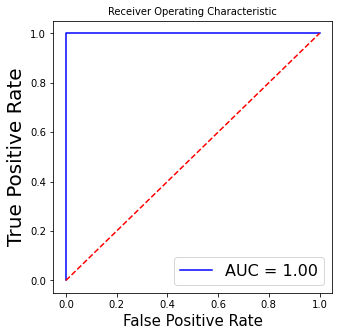

In [40]:
traindf(X_train_oq,y_train_oq,X_test_oq,y_test_oq,"-train Sample o & q ")



Model classifier =   LogisticRegression1- train Sample G & 8

****Results****

Classification and metrics based on train data-

[[115   0]
 [  0 115]]

Outcome values tp, fn, fp, tn : 
 115 0 0 115

Accuracy =  1.0
precision =  1.0
recall =  1.0
f1score =  1.0

mean_absolute_error =  0.0
mean_squared_error =  0.0

------------------------------------------------------------------------------


Raw data input ROC Curve


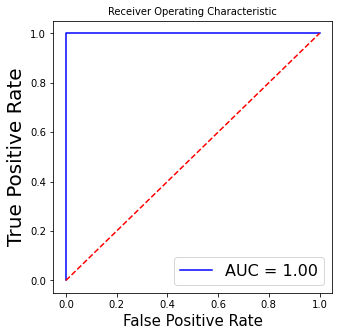

In [41]:
traindf(X_train_G8,y_train_G8,X_test_G8,y_test_G8,"- train Sample G & 8")

###### Metrics on test data



Model classifier =   LogisticRegression- test Sample o & q

****Results****


Classification and metrics based on test data-

[[28  1]
 [ 9  3]]

Outcome values tp, fn, fp, tn : 
 28 1 9 3

Accuracy =  0.76
precision =  0.7567567567567568
recall =  0.9655172413793104
f1score =  0.8484848484848485

mean_absolute_error =  0.24390243902439024
mean_squared_error =  0.24390243902439024

------------------------------------------------------------------------------


Raw data input ROC Curve


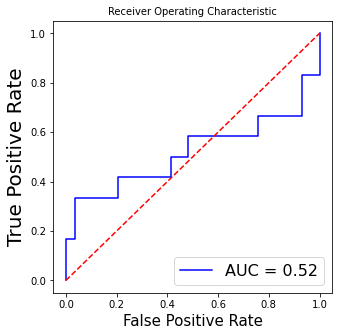

In [42]:
testdf(X_train_oq,y_train_oq,X_test_oq,y_test_oq,"- test Sample o & q")



Model classifier =   LogisticRegression-test Sample G & 8 

****Results****


Classification and metrics based on test data-

[[24  4]
 [ 4  3]]

Outcome values tp, fn, fp, tn : 
 24 4 4 3

Accuracy =  0.77
precision =  0.8571428571428571
recall =  0.8571428571428571
f1score =  0.8571428571428571

mean_absolute_error =  0.22857142857142856
mean_squared_error =  0.22857142857142856

------------------------------------------------------------------------------


Raw data input ROC Curve


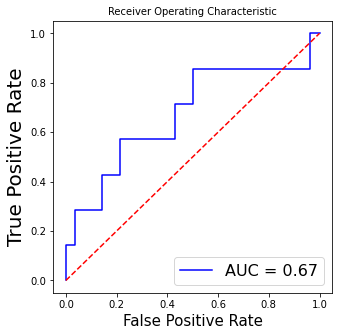

In [43]:
testdf(X_train_G8,y_train_G8,X_test_G8,y_test_G8,"-test Sample G & 8 ")

###### Result evaluation:
    It is clearly evident from the acuuracies that model is ideal on train data.
    Test classification
    Class "o" and "q"
    -(75%) of the classes 0  predictions are right.(Precision)
    -(96%) of classes 1 is predicted right.(Recall)
    -(84%) of F1-score
    
    Classes "G" and "8"
    -(85%) of the classes 0 predictions are right.(Precision)
    -(85%) of classes 1 is predicted right.(Recall)
    -(85%) of F1-score
 
    The average precision and recall is lower than the training phase.
    The classifier does not perform much good on the test data when compared to train data.
    Then in train data, the model is performing better on Data(o,q) than on data(G,8) comparing all the elements of metrics.
    To depict relatively from the other relevent metrics, the both models performed average and same as the differences in 
    metrics falls in between the range (0-0.9).
    
        Class 1 has a high f1 score in both the train and test phases, indicating that class 1 has been well-trained and that the model produces stronger class 1 predictions.
        The number of samples in class 0 is significantly lower than that of class 1. This is also why the model makes superior class 1 predictions, because the classifier received more true(not synthetically created by SMOTE) inputs to learn from in class 1.
    
    But while comapring the ROC curve, From the AUC score we can see that second model is better as it is more close to the ideal solution.  

##### Multiclass classification using Logistic Regression

The problem of categorising samples into one of three or more classes is multiclass or multinomial classification.

Here, I'm using logistic regression(multi-class="ovr",solver = "liblinear") as my model classifier for the data samples ["o","q","G","8"].

The evaluation is done using same metrics as for binary classification.

In [61]:
# Grid search cross validation
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=5)
logreg_cv.fit(X_train_oqG8, y_train_oqG8)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 100.0, 'penalty': 'l2'}
accuracy : 0.6875


In [69]:
    #LogisticRegression(penalty='none',tol=0.001, solver='saga',class_weight="balanced",random_state=10)
clf =  LogisticRegression(C=100,penalty="l2",multi_class='ovr', solver='liblinear',tol=0.001,class_weight="balanced",random_state=10)

name = (clf.__class__.__name__) + ("-multiclass") 
print("\nModel classifier = ",name)
print('\n****Results****')
clfN=cross_val_score(clf, X_train_oqG8, y_train_oqG8, cv=cv)
table_acc[name]=clfN
print("\nTen-fold cross validation score\n\n",clfN)
acc=clfN.mean()
print("\nMean Accuracy - ",acc) 
print("\n------------------------------------------------------------------------------------------\n")


Model classifier =  LogisticRegression-multiclass

****Results****

Ten-fold cross validation score

 [0.6875     0.67708333 0.75       0.69791667 0.76041667]

Mean Accuracy -  0.7145833333333333

------------------------------------------------------------------------------------------



In [70]:
Cv_scores=table_acc.copy()
Cv_scores.loc['mean'] = Cv_scores.mean()
Cv_scores.loc['stdev'] = Cv_scores.std()
Cv_scores=Cv_scores.round(decimals=4)
Cv_scores

,Kfold,LogisticRegression - Sample-o & q,LogisticRegression- Sample-G & 8,LogisticRegression-multiclass
0,Cv-1,0.8958,0.9348,0.6875
1,Cv-2,0.9583,0.8696,0.6771
2,Cv-3,0.9167,0.7826,0.7500
3,Cv-4,0.9362,0.9565,0.6979
4,Cv-5,0.8511,0.9348,0.7604
mean,NaN,0.9116,0.8957,0.7146
stdev,NaN,0.0367,0.0636,0.0340


In [71]:
from sklearn.metrics import accuracy_score

clf_fit = clf.fit(X_train_oqG8, y_train_oqG8)

def conf_mat(X_train,y_true):
   
    pred = clf_fit.predict(X_train)
    
    print("Accuracy score - ",accuracy_score(y_true, pred))
    
    cm = confusion_matrix(y_true, pred)
    print("\nconfusion_matrix",cm)

    mae_dt = metrics.mean_absolute_error(y_true, pred)
    mse_dt = metrics.mean_squared_error(y_true, pred)
    
    print("\nmean_absolute_error = ",mae_dt)
    print("mean_squared_error = ",mse_dt)

    print("\nclassification_report \n",classification_report(y_true, pred, labels=[0, 1, 2, 3]))

In [72]:

def metric_scores(X_train,y_test):
    
    pred = clf_fit.predict(X_train)
    
    cm_tab = pd.crosstab(y_test, pred)

    fig =plt.figure(figsize=(15,5))
    ax = plt.subplot(122)
    sns.heatmap(cm_tab,annot = True, cmap="Blues")
    
    for i in range(4):
    
        print("scores for class -",i)
        tp = cm_tab.iloc[i,i]
        fp = cm_tab.iloc[i,:].sum()-tp
        fn = cm_tab.iloc[:,i].sum()-tp
        tn = cm_tab.sum().sum()-tp-fp-fn
    
        Accuracy =(tp+tn)/cm_tab.sum().sum()
        Precision = tp/(tp+fp)
        Recall = tp/(tp+fn)
        F1_score = (2*Precision*Recall)/(Precision+Recall)
    

        print("\nScores - accuracy ",Accuracy)
        print("Scores - Precision ",Precision)
        print("Scores - Recall ",Recall)
        print("Scores - F1-score ",F1_score)
    
        print("\n--------------------------------------------\n")
    
    
    
    

Results for Train data
Accuracy score -  1.0

confusion_matrix [[120   0   0   0]
 [  0 120   0   0]
 [  0   0 120   0]
 [  0   0   0 120]]

mean_absolute_error =  0.0
mean_squared_error =  0.0

classification_report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       120
           1       1.00      1.00      1.00       120
           2       1.00      1.00      1.00       120
           3       1.00      1.00      1.00       120

    accuracy                           1.00       480
   macro avg       1.00      1.00      1.00       480
weighted avg       1.00      1.00      1.00       480

scores for class - 0

Scores - accuracy  1.0
Scores - Precision  1.0
Scores - Recall  1.0
Scores - F1-score  1.0

--------------------------------------------

scores for class - 1

Scores - accuracy  1.0
Scores - Precision  1.0
Scores - Recall  1.0
Scores - F1-score  1.0

--------------------------------------------

scores for class - 2

Scor

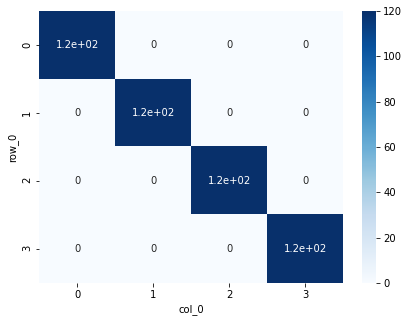

In [73]:
print("Results for Train data")
conf_mat(X_train_oqG8,y_train_oqG8)
metric_scores(X_train_oqG8,y_train_oqG8)

Results for Test data
Accuracy score -  0.4342105263157895

confusion_matrix [[18  0 12  0]
 [ 6  4  7  1]
 [12  1 10  0]
 [ 3  0  1  1]]

mean_absolute_error =  0.9736842105263158
mean_squared_error =  1.868421052631579

classification_report 
               precision    recall  f1-score   support

           0       0.46      0.60      0.52        30
           1       0.80      0.22      0.35        18
           2       0.33      0.43      0.38        23
           3       0.50      0.20      0.29         5

    accuracy                           0.43        76
   macro avg       0.52      0.36      0.38        76
weighted avg       0.51      0.43      0.42        76

scores for class - 0

Scores - accuracy  0.5657894736842105
Scores - Precision  0.6
Scores - Recall  0.46153846153846156
Scores - F1-score  0.5217391304347826

--------------------------------------------

scores for class - 1

Scores - accuracy  0.8026315789473685
Scores - Precision  0.2222222222222222
Scores - Recal

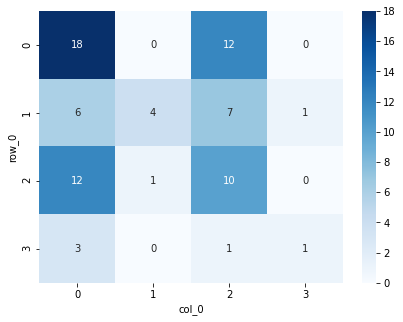

In [74]:
print("Results for Test data")
conf_mat(X_test_oqG8,y_test_oqG8)
metric_scores(X_test_oqG8,y_test_oqG8)

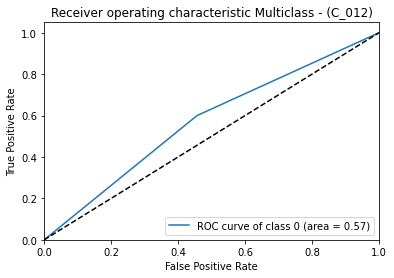

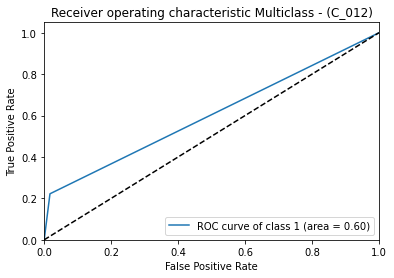

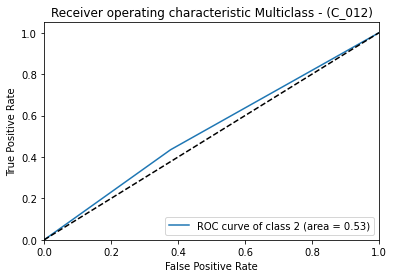

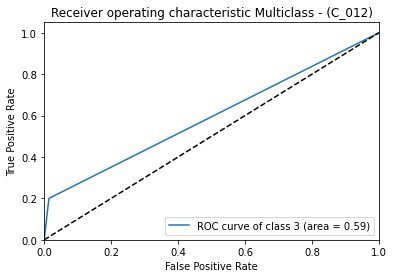

In [75]:
# Compute ROC curve and ROC area for each class
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize

predictions=clf_fit.predict(X_test_oqG8)

prediction = label_binarize(predictions, classes=[0, 1, 2, 3])
n_classes = 4
n_classes

y_test_all = label_binarize(y_test_oqG8, classes=[0, 1, 2, 3])
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_all[:, i], prediction[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic Multiclass - (C_012)')
    plt.legend(loc="lower right")
    plt.show()


###### Results Evaluation:
    
    We can see that multiclassification model is performing very poor compared to other models.
    The results of accuracy 
    name      class-0 class-1 class-2 class-3
    accuracy  56%     81%     57%      93%
    and mean is 42% which is very low.
    
    But the other metrics(precision,recall and F1-score) are significantly low as well comparatively.
    Model is performing poor on class-0 and class- 2 which have better true values of inputs.
    From the ROCcurves we can depict that the model is average fit which is better than model-1 as it left significant space from the
    diagoal of the curve.